# Homework

---

## Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

## _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

## Q1. Answer

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &=\frac{n!}{x!(n-x)!}\theta^{x}(1-\theta)^{n-x}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \;  \Bigg\{ \begin{array}{cl}  \frac{1}{A} \theta^{x}(1-\theta)^{n-x} & \text{for } \theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\end{align*}

where $A=\sum_{i=0}^{100}\ (\frac{i}{100})^{x}(1-\frac{i}{100})^{n-x}$. This is a discrete distribution with domain $\{\theta=\frac{i}{100}, i=0,\dots, 100\}$ and probability mass function $ \frac{1}{A} \theta^{x}(1-\theta)^{n-x}$.

The prior distribution can be considered as the discrete version of Dirichlet distribution, with parameter $\alpha=(1,1)$.

The posterior distribution can be considered as the discrete version of Dirichlet distribution, with updated parameter $\alpha+x=(1,1)+(x, n-x)=(x+1, n-x+1)$.

## Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

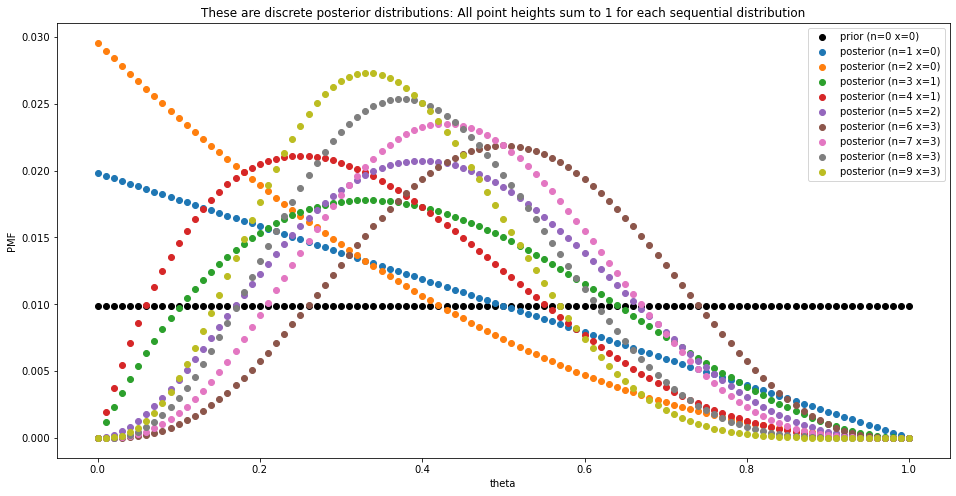

In [6]:
# Q2

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")
plt.xlabel("theta")
plt.ylabel("PMF")
posterior = np.copy(prior)

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update
    if observation == 0:
        posterior = posterior*(1-parameter_domain)
    else:
        posterior = posterior*parameter_domain
    posterior = posterior/sum(posterior)
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

## Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

## Q3. Answer

First we need to find out the true feature of the entities. Let the three entities be $x_1,x_2,x_3$ respectively and the chances of success be $\theta_1,\theta_2,\theta_3$. If the entities are independent, then we can analyze them separately. Therefore just like what we did in Q1, 2, we obtain three independent sequences of updated posterior distributions. This procedure is simple and easy to be visualized.

If the entities are not independent, for example, at most one of $x_1,x_2,x_3$ occurs at one time, then we cannot use Analysis 1. In this case we need to treat them as a combined event $X=(x_1,x_2,x_3,1-x_1-x_2-x_3)$, which follows multinomial distribution with parameter $(\theta_1,\theta_2,\theta_3,1-\theta_1-\theta_2-\theta_3)$, and $(\theta_1,\theta_2,\theta_3,1-\theta_1-\theta_2-\theta_3)$ follows some (discrete or continuous) Dirichlet distribution. Thus the update of parameter for the posterior distribution of $(\theta_1,\theta_2,\theta_3,1-\theta_1-\theta_2-\theta_3)$ is $\alpha^{(t)}=\alpha^{(t-1)}+X^{(t)}$

Based on the above discussions, we see that whcih analysis is appropriate depends on the feature of the entities. If they are independent, then we shall use Analysis 1. If at most one of $x_1,x_2,x_3$ occurs at one time, then we shall use Analysis 2.